In [20]:
import numpy as np
import os
import glob
import tensorflow as tf
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

train_path = "Dataset/train"
test_path = "Dataset/test"

In [21]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [22]:
# Get a list of MRI images for training
train_mri_images = [os.path.abspath(path) for path in glob.glob(f'{train_path}/MRI/*.nii')]

# Get a list of ultrasound images for training
train_ultrasound_images = [os.path.abspath(path) for path in glob.glob(f'{train_path}/US/*.nii')]

# Get a list of MRI images for testing
test_mri_images = [os.path.abspath(path) for path in glob.glob(f'{test_path}/MRI/*.nii')]

# Get a list of ultrasound images for testing
test_ultrasound_images = [os.path.abspath(path) for path in glob.glob(f'{test_path}/US/*.nii')]

'''
print("Number of MRI images for training:", len(train_mri_images))
print("Number of ultrasound images for training:", len(train_ultrasound_images))
print("Number of MRI images for testing:", len(test_mri_images))
print("Number of ultrasound images for testing:", len(test_ultrasound_images))
'''

'\nprint("Number of MRI images for training:", len(train_mri_images))\nprint("Number of ultrasound images for training:", len(train_ultrasound_images))\nprint("Number of MRI images for testing:", len(test_mri_images))\nprint("Number of ultrasound images for testing:", len(test_ultrasound_images))\n'

Ultrasound images from **train** directory will be used as **X** for data, while **MRI** images will be the y label for the dataset. Similarly for **val** dataset, we can evaluate the performance of the trained model by treating the variables in the same manner, where we use the ultrasound data to create a MRI image. 

In [23]:
import SimpleITK as sitk
import numpy as np
import os
import glob

# Create an empty list to store the numpy arrays
train_mri_arrays = []

# Loop through each image path, read the image, and append the numpy array to the list
for image_path in train_mri_images:
    sitk_image = sitk.ReadImage(image_path)
    np_image = sitk.GetArrayFromImage(sitk_image)
    train_mri_arrays.append(np_image)

# Print the number of images and their shapes
'''print(f"Number of MRI images for training: {len(train_mri_arrays)}")
for i, np_image in enumerate(train_mri_arrays):
    print(f"Shape of MRI image {i}: {np_image.shape}")
'''

'print(f"Number of MRI images for training: {len(train_mri_arrays)}")\nfor i, np_image in enumerate(train_mri_arrays):\n    print(f"Shape of MRI image {i}: {np_image.shape}")\n'

In [24]:
# Create an empty list to store the numpy arrays
train_ultrasound_arrays = []

# Loop through each image path, read the image, and append the numpy array to the list
for image_path in train_ultrasound_images:
    sitk_image = sitk.ReadImage(image_path)
    np_image = sitk.GetArrayFromImage(sitk_image)
    train_ultrasound_arrays.append(np_image)

# Print the number of images and their shapes
'''print(f"Number of Ultrasound images for training: {len(train_ultrasound_arrays)}")
for i, np_image in enumerate(train_ultrasound_arrays):
    print(f"Shape of Ultrasound image {i}: {np_image.shape}")
'''

'print(f"Number of Ultrasound images for training: {len(train_ultrasound_arrays)}")\nfor i, np_image in enumerate(train_ultrasound_arrays):\n    print(f"Shape of Ultrasound image {i}: {np_image.shape}")\n'

In [25]:
# Create an empty list to store the numpy arrays
test_mri_arrays = []

# Loop through each image path, read the image, and append the numpy array to the list
for image_path in test_mri_images:
    sitk_image = sitk.ReadImage(image_path)
    
    input_img = nib.load(image_path)
    input_data = input_img.get_fdata()
    
    np_image = sitk.GetArrayFromImage(sitk_image)
    test_mri_arrays.append(np_image)

# Print the number of images and their shapes
'''print(f"Number of MRI images for testing: {len(test_mri_arrays)}")
for i, np_image in enumerate(test_mri_arrays):
    print(f"Shape of MRI image {i}: {np_image.shape}")
'''

'print(f"Number of MRI images for testing: {len(test_mri_arrays)}")\nfor i, np_image in enumerate(test_mri_arrays):\n    print(f"Shape of MRI image {i}: {np_image.shape}")\n'

In [26]:
# Create an empty list to store the numpy arrays
test_ultrasound_arrays = []

# Loop through each image path, read the image, and append the numpy array to the list
for image_path in test_ultrasound_images:
    sitk_image = sitk.ReadImage(image_path)
    
    np_image = sitk.GetArrayFromImage(sitk_image)
    test_ultrasound_arrays.append(np_image)

# Print the number of images and their shapes
'''
print(f"Number of ultrasound images for testing: {len(test_ultrasound_arrays)}")
for i, np_image in enumerate(test_ultrasound_arrays):
    print(f"Shape of ultrasound image {i}: {np_image.shape}")
'''

'\nprint(f"Number of ultrasound images for testing: {len(test_ultrasound_arrays)}")\nfor i, np_image in enumerate(test_ultrasound_arrays):\n    print(f"Shape of ultrasound image {i}: {np_image.shape}")\n'

In [27]:
import numpy as np
from scipy import ndimage

# Set the target dimensions
x_dim = 128
y_dim = 128
z_dim = 128

resized_train_mri_images = np.zeros((len(train_mri_arrays), x_dim, y_dim, z_dim))
resized_train_ultrasound_images = np.zeros((len(train_ultrasound_arrays), x_dim, y_dim, z_dim))

# Resize all the training images to the same shape
for i, img in enumerate(train_mri_arrays):
    resized_train_mri_images[i] = ndimage.zoom(img, (x_dim/img.shape[0], y_dim/img.shape[1], z_dim/img.shape[2]), order=1)
for i, img in enumerate(train_ultrasound_arrays):
    resized_train_ultrasound_images[i] = ndimage.zoom(img, (x_dim/img.shape[0], y_dim/img.shape[1], z_dim/img.shape[2]), order=1)

# Print the shapes of the resized training images to confirm they all have the same shape
print(resized_train_mri_images.shape)
print(resized_train_ultrasound_images.shape)

# Update original training arrays with resized arrays
train_mri_arrays = resized_train_mri_images
train_ultrasound_arrays = resized_train_ultrasound_images

# Free memory of resized arrays
del resized_train_mri_images
del resized_train_ultrasound_images

# Resize test images
resized_test_mri_images = np.zeros((len(test_mri_arrays), x_dim, y_dim, z_dim))
resized_test_ultrasound_images = np.zeros((len(test_ultrasound_arrays), x_dim, y_dim, z_dim))

# Resize all the test images to the same shape
for i, img in enumerate(test_mri_arrays):
    resized_test_mri_images[i] = ndimage.zoom(img, (x_dim/img.shape[0], y_dim/img.shape[1], z_dim/img.shape[2]), order=1)
for i, img in enumerate(test_ultrasound_arrays):
    resized_test_ultrasound_images[i] = ndimage.zoom(img, (x_dim/img.shape[0], y_dim/img.shape[1], z_dim/img.shape[2]), order=1)

# Print the shapes of the resized test images to confirm they all have the same shape
print(resized_test_mri_images.shape)
print(resized_test_ultrasound_images.shape)

# Update test arrays with resized arrays
test_mri_arrays = resized_test_mri_images
test_ultrasound_arrays = resized_test_ultrasound_images

# Free memory of resized test arrays
del resized_test_mri_images
del resized_test_ultrasound_images

(18, 128, 128, 128)
(18, 128, 128, 128)
(4, 128, 128, 128)
(4, 128, 128, 128)


In [28]:
train_mri_arrays[0].dtype

dtype('float64')

In [29]:
IMG_HEIGHT = 64
IMG_WIDTH = 64
IMG_LENGTH = 64

In [30]:
from torchvision import transforms
@tf.function()
def load(image):
    return tf.cast(image, tf.float32)
def random_crop(input_image, real_image):
    stacked_image = tf.stack([input_image, real_image], axis=0)
    cropped_image = tf.image.random_crop(stacked_image, size=[2,IMG_HEIGHT, IMG_WIDTH, IMG_LENGTH])
    return cropped_image[0], cropped_image[1]

def resize(input_image, real_image, height, width, length):
    input_image = tf.image.resize(input_image, [height, width,length],method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    real_image = tf.image.resize(real_image, [height, width,length],method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return input_image, real_image

def normalize(input_image, real_image):    
    input_image = input_image/255
    real_image = real_image/255
    return input_image, real_image

def random_jitter(input_image, real_image):
    input_image, real_image = random_crop(input_image, real_image)
    if tf.random.uniform(()) > 0.5:
    # Random mirroring
        input_image = tf.image.flip_left_right(input_image)
        real_image = tf.image.flip_left_right(real_image)
    return input_image, real_image

In [31]:
#for i in range(0, len(train_mri_arrays)):
    #x,y = normalize(train_mri_arrays[i], train_ultrasound_arrays[i])
    #print(train_mri_arrays[i].min(), train_ultrasound_arrays[i].min(), x.min(), y.min())
    #print(train_mri_arrays[i].max(), train_ultrasound_arrays[i].max(), x.max(), y.max())
    #print(train_mri_arrays[i].max() - train_ultrasound_arrays[i].max(),train_mri_arrays[i].min() - train_ultrasound_arrays[i].min())
    #print(x[i].max() - y[i].max(),x[i].min() - y[i].min())

In [32]:
x,y = normalize(train_mri_arrays[0], train_ultrasound_arrays[0])
print(train_mri_arrays[0].min(), train_ultrasound_arrays[0].min(), x.min(), y.min())
print(train_mri_arrays[0].max(), train_ultrasound_arrays[0].max(), x.max(), y.max())

7.3698601722717285 0.0 0.02890141244028129 0.0
168.44772338867188 205.49639892578125 0.6605793074065563 0.8058682310814951


In [33]:
def load_image_train(input_image, real_image):
    input_image = load(input_image)
    real_image = load(real_image)
    input_image, real_image = random_jitter(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)
    return input_image, real_image

def load_image_test(input_image, real_image):
    input_image = load(input_image)
    real_image = load(real_image)
    input_image, real_image = random_crop(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)
    return input_image, real_image

In [34]:
train_ultrasound_arrays = [item for item in train_ultrasound_arrays for i in range(4)]
train_mri_arrays = [item for item in train_mri_arrays for i in range(4)]

test_ultrasound_arrays = [item for item in test_ultrasound_arrays for i in range(3)]
test_mri_arrays = [item for item in test_mri_arrays for i in range(3)]
print(len(train_ultrasound_arrays), len(train_mri_arrays))

72 72


In [35]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_ultrasound_arrays, train_mri_arrays))
test_dataset = tf.data.Dataset.from_tensor_slices((test_ultrasound_arrays, test_mri_arrays))

In [36]:
BUFFER_SIZE = 64
BATCH_SIZE = 1
train_dataset = train_dataset.map(load_image_train,num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

In [18]:
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [19]:
OUTPUT_CHANNELS = IMG_LENGTH
OUTPUT_CHANNELS

64

In [20]:
def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

    if apply_batchnorm:
        result.add(tf.keras.layers.BatchNormalization())

    result.add(tf.keras.layers.LeakyReLU())
    return result

In [21]:
def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))
    result.add(tf.keras.layers.BatchNormalization())
    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))
    result.add(tf.keras.layers.ReLU())
    return result

In [22]:
down_model = downsample(32, 4)
down_result = down_model(tf.expand_dims(train_mri_arrays[0], 0))
print (down_result.shape)
up_model = upsample(32, 4)
up_result = up_model(down_result)
print (up_result.shape)

(1, 64, 64, 32)
(1, 128, 128, 32)


In [23]:
del train_ultrasound_arrays
del train_mri_arrays
del test_mri_arrays
del test_ultrasound_arrays

In [24]:
def Generator():
    inputs = tf.keras.layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_LENGTH])

    down_stack = [
    downsample(32, 4, apply_batchnorm=False),
    downsample(64, 4),  
    downsample(128, 4),  
    downsample(256, 4), 
    downsample(512, 4), 
    downsample(512, 4), 
    #downsample(512, 4),  
    #downsample(512, 4), 
  ]

    up_stack = [
    upsample(512, 4, apply_dropout=True), 
    upsample(512, 4, apply_dropout=True), 
    upsample(512, 4, apply_dropout=True),  
    #upsample(512, 4), 
    upsample(256, 4),  
    upsample(128, 4),  
    upsample(64, 4),  
  ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

    x = inputs

  # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

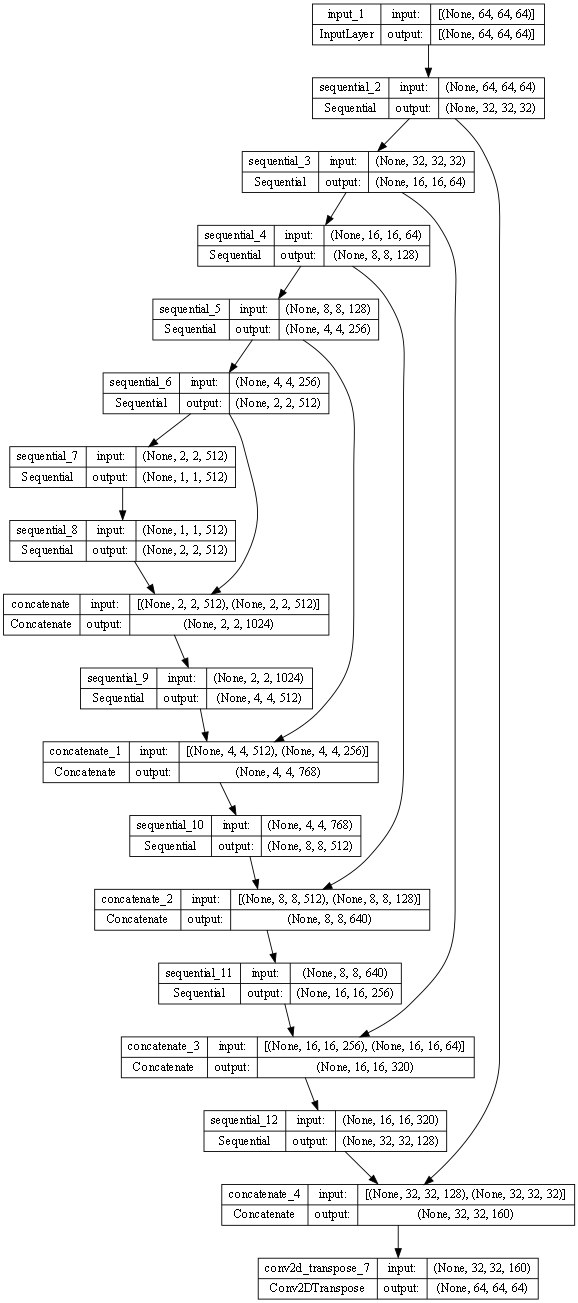

In [25]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

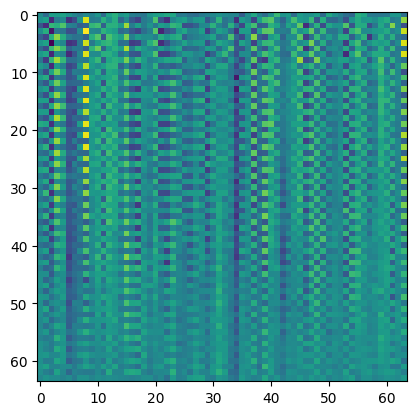

In [26]:
x = []
y = []
for US, MRI in train_dataset.take(1):
    x = US[0]
    y = MRI[0]
    
gen_output = generator(x[tf.newaxis, ...], training=False)
plt.imshow(y[20])
plt.imshow(gen_output[0, ...][20])
plt.show()

In [27]:
LAMBDA = 100
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    total_gen_loss = gan_loss + (LAMBDA * l1_loss)

    return total_gen_loss, gan_loss, l1_loss

In [28]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    inp = tf.keras.layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_LENGTH], name='input_image')
    tar = tf.keras.layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_LENGTH], name='target_image')
    x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)
    down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
    down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
    down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)
    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down2)  # (batch_size, 34, 34, 256)
    conv = tf.keras.layers.Conv2D(512, 4, strides=1,kernel_initializer=initializer,use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

    batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

    leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

    last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

    return tf.keras.Model(inputs=[inp, tar], outputs=last)

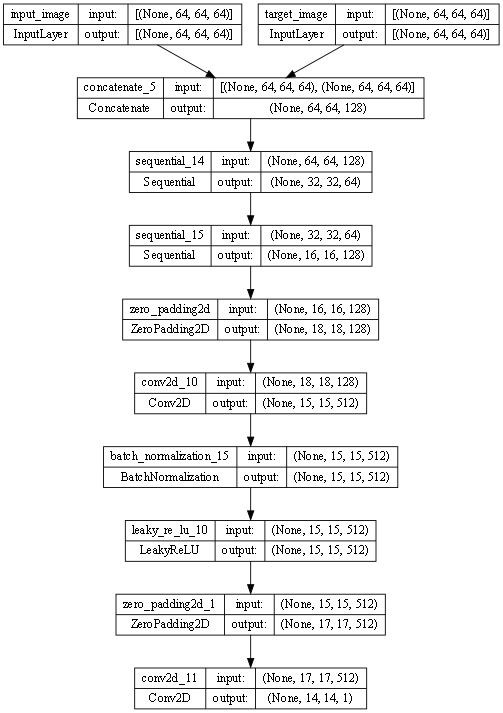

In [29]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

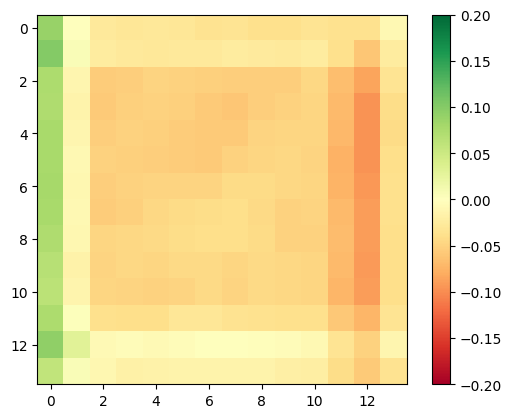

In [30]:
disc_out = discriminator([y[tf.newaxis, ...], gen_output], training=False)
#print(disc_out)
plt.imshow(disc_out[0, ..., -1], vmin=-0.2, vmax=0.2, cmap='RdYlGn')
plt.colorbar()

In [31]:
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

    total_disc_loss = real_loss + generated_loss
    return total_disc_loss

In [32]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [33]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [34]:
input_img_affines = [] 
for image in test_mri_images:
    img = nib.load(image)
    input_img_affines.append(img.affine)

In [35]:
import os

output_path = "Output/"
test_path = "Test/"

counter = 0

def generate_images(model, test_input, tar, save=False):
    global counter
    prediction = model(test_input, training=True)
    #print(tar.shape)
    if save == True:
        for pred in prediction:
            output_filename = os.path.join(output_path, f"{counter}.nii")
            test_filename = os.path.join(test_path, f"{counter}.nii")
            
            output_img = nib.Nifti1Image(pred.numpy(), affine=input_img_affines[counter%len(input_img_affines)])
            original_img = nib.Nifti1Image(tar[counter%len(input_img_affines)].numpy(),affine=input_img_affines[counter%len(input_img_affines)])
            
            nib.save(output_img, output_filename)
            nib.save(original_img, test_filename)
            
            counter = counter + 1
                       
    plt.figure(figsize=(15, 15))
    display_list = [test_input[0][0], tar[0][0], prediction[0][0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # Getting the pixel values in the [0, 1] range to plot.
        plt.imshow(display_list[i] * 0.5 + 0.5, cmap='gray')
        plt.axis('off')
    plt.show()

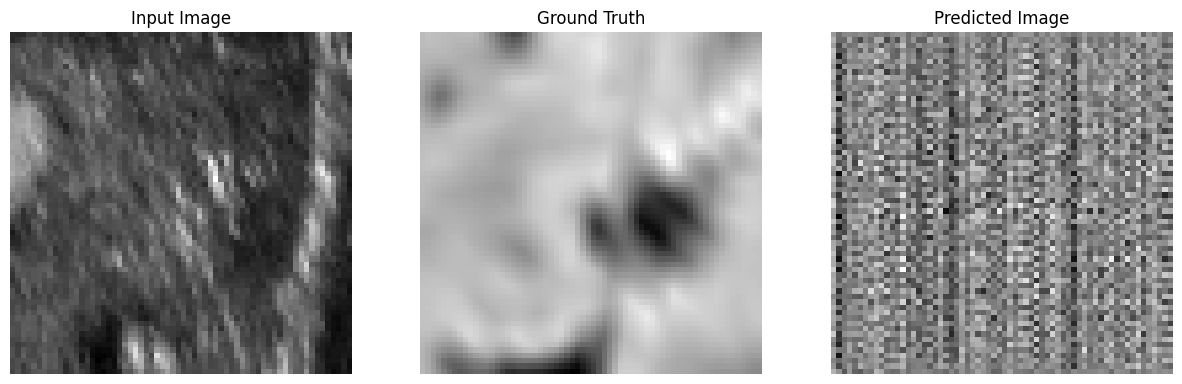

In [36]:
for example_input, example_target in test_dataset.take(1):
    generate_images(generator, example_input, example_target)

In [37]:
import datetime
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [38]:
@tf.function
def train_step(input_image, target, step):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)
    
        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

    with summary_writer.as_default():
        tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
        tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
        tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
        tf.summary.scalar('disc_loss', disc_loss, step=step//1000)

In [39]:
def fit(train_ds, test_ds, steps):
    example_input, example_target = next(iter(test_ds.take(1)))
    start = time.time()

    for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
        if (step) % 1000 == 0:
            display.clear_output(wait=True)

            if step != 0:
                print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')
            start = time.time()
            generate_images(generator, example_input, example_target)
            print(f"Step: {step//1000}k")
        train_step(input_image, target, step)

    # Training step
        if (step+1) % 100 == 0:
            print('.', end='', flush=True)


    # Save (checkpoint) the model every 5k steps
        if (step + 1) % 5000 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

In [40]:
#%reload_ext tensorboard
%load_ext tensorboard
import time
%tensorboard --logdir {log_dir}

ERROR: Failed to launch TensorBoard (exited with 1).

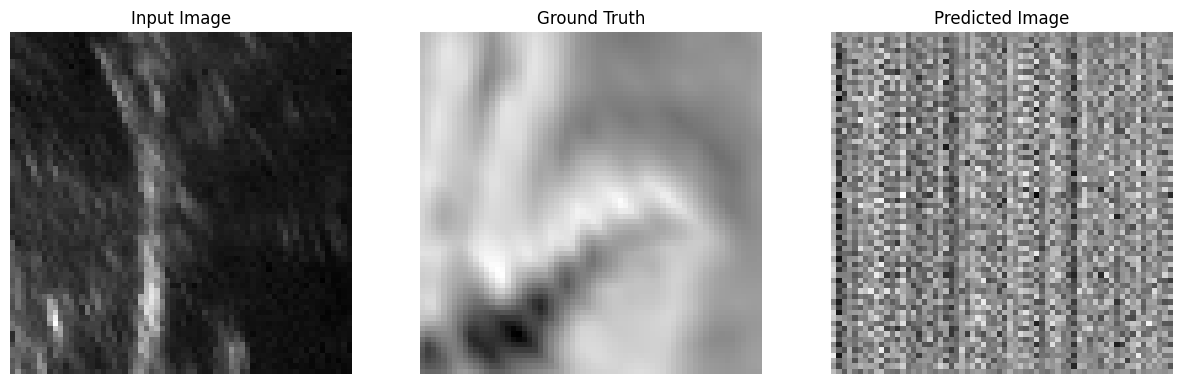

Step: 0k


In [ ]:
from IPython import display
counter = 0
fit(train_dataset, test_dataset, steps=40000)

In [ ]:
tensorboard dev upload --logdir {log_dir}

In [ ]:
#checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
display.IFrame(
    src="https://tensorboard.dev/experiment/lZ0C6FONROaUMfjYkVyJqw",
    width="100%",
    height="1000px")

In [ ]:
# Run the trained model on a few examples from the test set
counter = 0
for inp, tar in test_dataset.take(4):
    print(inp.shape)
    generate_images(generator, inp, tar, save = True)